# CZ1115 Mini Project

## Problem: What makes a successful movie?

### Our definition of a succesful movie is when a movie's revenue is twice or more than its budget.

### Data Extraction using MovieDB API

    To run the cell, please remove the docstring

In [402]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Movie Dataset Cleaning

In [403]:
movieData = pd.read_csv('movies.csv')
movieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date
0,Godzilla vs. Kong,200000000,123100000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...","[{'id': 174, 'logo_path': '/ky0xOc5OrhzkZ1N6Ky...",2021-03-24
1,Zack Snyder's Justice League,70000000,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 174, 'logo_path': '/ky0xOc5OrhzkZ1N6Ky...",2021-03-18
2,Raya and the Last Dragon,0,56482606,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",2021-03-03
3,승리호,21000000,0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...","[{'id': 11589, 'logo_path': None, 'name': 'Bid...",2021-02-05
4,Sentinelle,0,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...","[{'id': 12648, 'logo_path': None, 'name': 'Lab...",2021-03-05


### As some of the movies have zero budget/revenue, we decided to exclude them from our data.

In [404]:
movieData['Budget'] = movieData['Budget'].replace(0,np.nan)
movieData['Revenue'] = movieData['Revenue'].replace(0,np.nan)
movieData = movieData.dropna()
movieData = movieData.reset_index(drop=True)
movieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date
0,Godzilla vs. Kong,200000000.0,123100000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...","[{'id': 174, 'logo_path': '/ky0xOc5OrhzkZ1N6Ky...",2021-03-24
1,Monster Hunter,60000000.0,25814306.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...","[{'id': 7220, 'logo_path': '/dD0x5awPmtx4sAr2p...",2020-12-03
2,Tom & Jerry,50000000.0,66890000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[{'id': 25120, 'logo_path': '/lqUpBvDLQYG3QaKN...",2021-02-11
3,Wonder Woman 1984,200000000.0,165160000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...","[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...",2020-12-16
4,King Kong vs. Godzilla,12000.0,2700000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","[{'id': 882, 'logo_path': '/fRSWWjquvzcHjACbtF...",1963-06-26


### We decided to only extract the first genre in Genres which appears to be the primary Genre of each movie. 

In [405]:
import re

GenreData = movieData['Genres']

pattern = "'name': '(['a-zA-Z ']+)'"

for i in range(4316): 
    try:
        temp = re.findall(pattern, GenreData[i])[0]
        GenreData[i] = temp
    except:
        pass
    
movieData['Genres'] = GenreData

movieData.head()

<ipython-input-405-0987b72a10dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GenreData[i] = temp


,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,"[{'id': 174, 'logo_path': '/ky0xOc5OrhzkZ1N6Ky...",2021-03-24
1,Monster Hunter,60000000.0,25814306.0,Fantasy,"[{'id': 7220, 'logo_path': '/dD0x5awPmtx4sAr2p...",2020-12-03
2,Tom & Jerry,50000000.0,66890000.0,Action,"[{'id': 25120, 'logo_path': '/lqUpBvDLQYG3QaKN...",2021-02-11
3,Wonder Woman 1984,200000000.0,165160000.0,Fantasy,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...",2020-12-16
4,King Kong vs. Godzilla,12000.0,2700000.0,Science Fiction,"[{'id': 882, 'logo_path': '/fRSWWjquvzcHjACbtF...",1963-06-26


### Just as we did for Genres, we decided to only extract the first production company in Production_Companies which appears to be the primary production company of each movie. 

In [406]:
import re

companyData = movieData['Production_Companies']

pattern = "'name': '(['a-zA-Z0-9- . , ( ) / \ ']+)'"

for i in range(4316): 
    try:
        temp = re.findall(pattern, companyData[i])[0].split("'")[0]
        companyData[i] = temp
    except:
        pass
    
movieData['Production_Companies'] = companyData

movieData.head()

<ipython-input-406-5b71ee978e1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companyData[i] = temp


,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,Warner Bros. Pictures,2021-03-24
1,Monster Hunter,60000000.0,25814306.0,Fantasy,CAPCOM,2020-12-03
2,Tom & Jerry,50000000.0,66890000.0,Action,Warner Animation Group,2021-02-11
3,Wonder Woman 1984,200000000.0,165160000.0,Fantasy,DC Entertainment,2020-12-16
4,King Kong vs. Godzilla,12000.0,2700000.0,Science Fiction,"Toho Company, Ltd.",1963-06-26


### We converted the release date into the release month.

In [407]:
import datetime
import calendar
movieData['Release_Month'] = pd.DatetimeIndex(movieData['Release_Date']).month
movieData.head()

totalMovieData = movieData.reset_index(drop=True)
totalMovieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,Warner Bros. Pictures,2021-03-24,3
1,Monster Hunter,60000000.0,25814306.0,Fantasy,CAPCOM,2020-12-03,12
2,Tom & Jerry,50000000.0,66890000.0,Action,Warner Animation Group,2021-02-11,2
3,Wonder Woman 1984,200000000.0,165160000.0,Fantasy,DC Entertainment,2020-12-16,12
4,King Kong vs. Godzilla,12000.0,2700000.0,Science Fiction,"Toho Company, Ltd.",1963-06-26,6


### We extracted all successful movies that follow our definition, and added them into a new dataframe successMovieData.

In [408]:
for i in range(4316):
    try:
        if(2*movieData['Budget'][i] >= movieData['Revenue'][i]):
            movieData['Revenue'][i] = np.NaN
    except:
        pass

successMovieData = movieData.dropna()
        
successMovieData = successMovieData.reset_index(drop=True) # to reorder the index

successMovieData.head()

<ipython-input-408-bd41abefc636>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movieData['Revenue'][i] = np.NaN


,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month
0,King Kong vs. Godzilla,12000.0,2700000.0,Science Fiction,"Toho Company, Ltd.",1963-06-26,6
1,Godzilla: King of the Monsters,170000000.0,386600138.0,Science Fiction,Legendary Pictures,2019-05-29,5
2,The Croods: A New Age,65000000.0,135076090.0,Family,Universal Pictures,2020-11-25,11
3,Birds of Prey (and the Fantabulous Emancipatio...,75000000.0,201858461.0,Action,DC Entertainment,2020-02-05,2
4,백두산,17700000.0,61321941.0,Action,Dexter Studios,2019-12-19,12


### 

# Exploratory Data Analysis 

### To visualise the factors affecting Success of a Movie

## 1. Visualising the Release Month Data

### Total Number of Movies Released by Month

Text(0.5, 1.0, 'Total Number of Movies Released by Month')

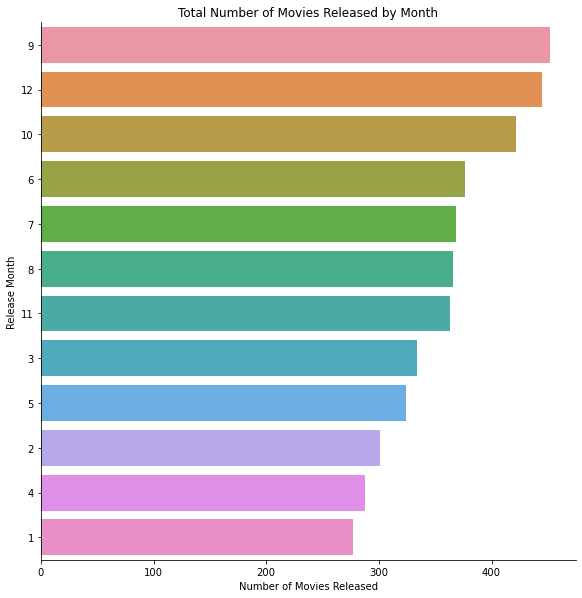

In [409]:
sb.catplot(y = "Release_Month", data = totalMovieData, order = totalMovieData["Release_Month"].value_counts(sort=True).index, kind = "count", height = 8)
plt.ylabel("Release Month")
plt.xlabel("Number of Movies Released")
plt.title("Total Number of Movies Released by Month")

### Total Number of Successful Movies Released by Month

Text(0.5, 1.0, 'Total Number of Successful Movies Released Per Month')

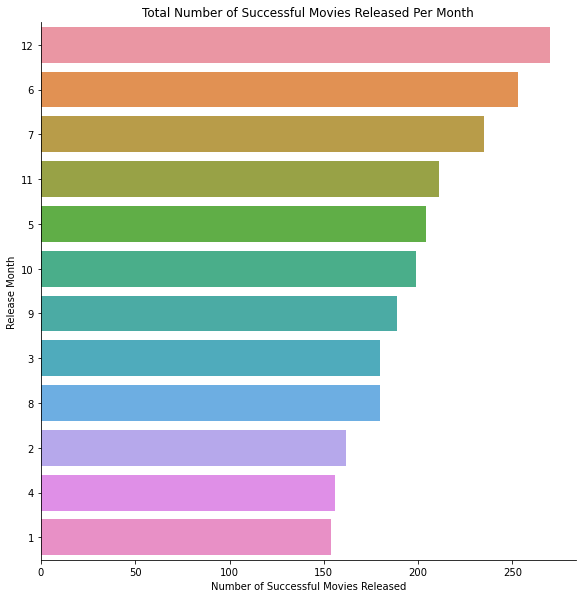

In [410]:
sb.catplot(y = 'Release_Month', data = successMovieData, order = successMovieData["Release_Month"].value_counts(sort=True).index, kind = "count", height = 8)
plt.ylabel("Release Month")
plt.xlabel("Number of Successful Movies Released")
plt.title("Total Number of Successful Movies Released Per Month")

## 2. Visualising the Genre Data

### Total Number of Movies Released by Genre

Text(0.5, 1.0, 'Total Number of Movies Released by Genre')

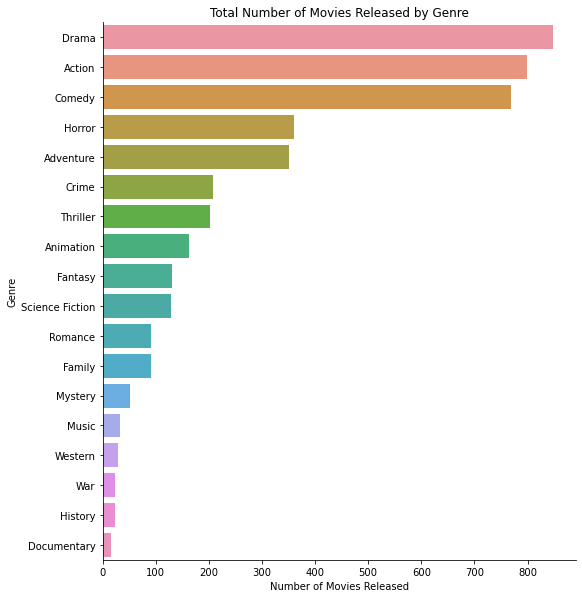

In [411]:
sb.catplot(y = 'Genres', data = totalMovieData,order = totalMovieData["Genres"].value_counts(sort=True).index, kind = "count", height = 8)
plt.ylabel("Genre")
plt.xlabel("Number of Movies Released")
plt.title("Total Number of Movies Released by Genre")

### Total Number of Successsful Movies Released by Genre

Text(0.5, 1.0, 'Total Number of Successful Movies Released by Genre')

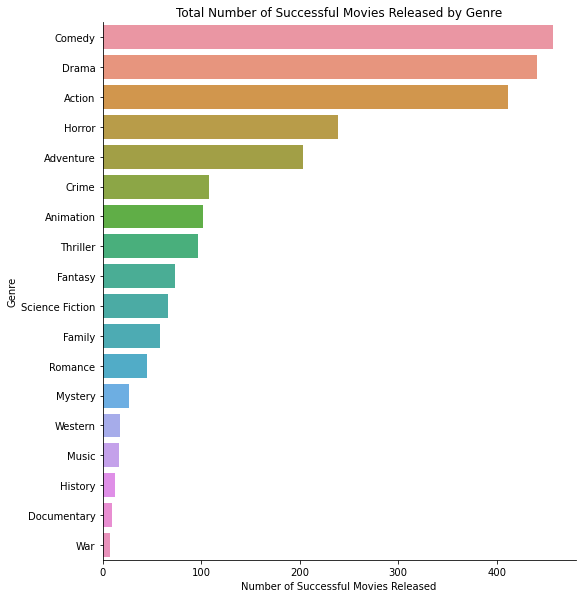

In [412]:
sb.catplot(y = 'Genres', data = successMovieData,order = successMovieData["Genres"].value_counts(sort=True).index, kind = "count", height = 8)
plt.ylabel("Genre")
plt.xlabel("Number of Successful Movies Released")
plt.title("Total Number of Successful Movies Released by Genre")

## 3. Visualising the Budget Data

### Total Number of Movies' Budget

<AxesSubplot:>

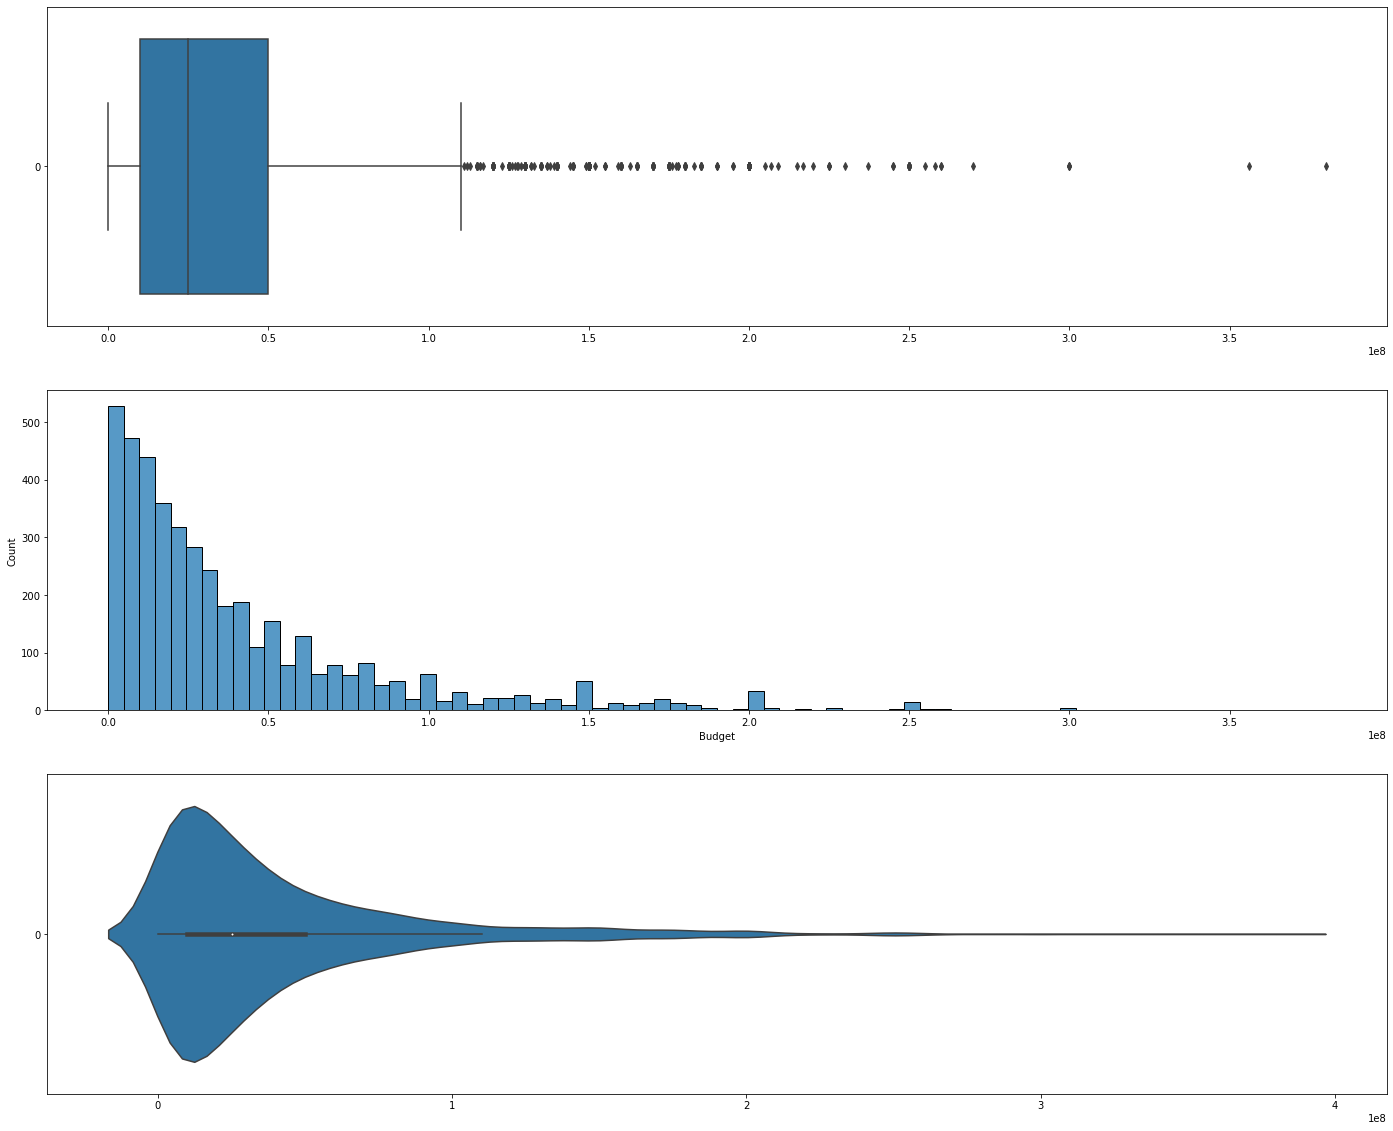

In [413]:
f, axes = plt.subplots(3, 1, figsize=(24, 20))
sb.boxplot(data = totalMovieData['Budget'], orient = "h", ax = axes[0])
sb.histplot(data = totalMovieData['Budget'], ax = axes[1])
sb.violinplot(data = totalMovieData['Budget'], orient = "h", ax = axes[2])

In [414]:
totalMovieData["Budget"].describe()

count    4.316000e+03
mean     3.976906e+07
std      4.513917e+07
min      5.000000e+00
25%      1.000000e+07
50%      2.500000e+07
75%      5.000000e+07
max      3.800000e+08
Name: Budget, dtype: float64

### Total Number of Successsful Movies' Budget

<AxesSubplot:>

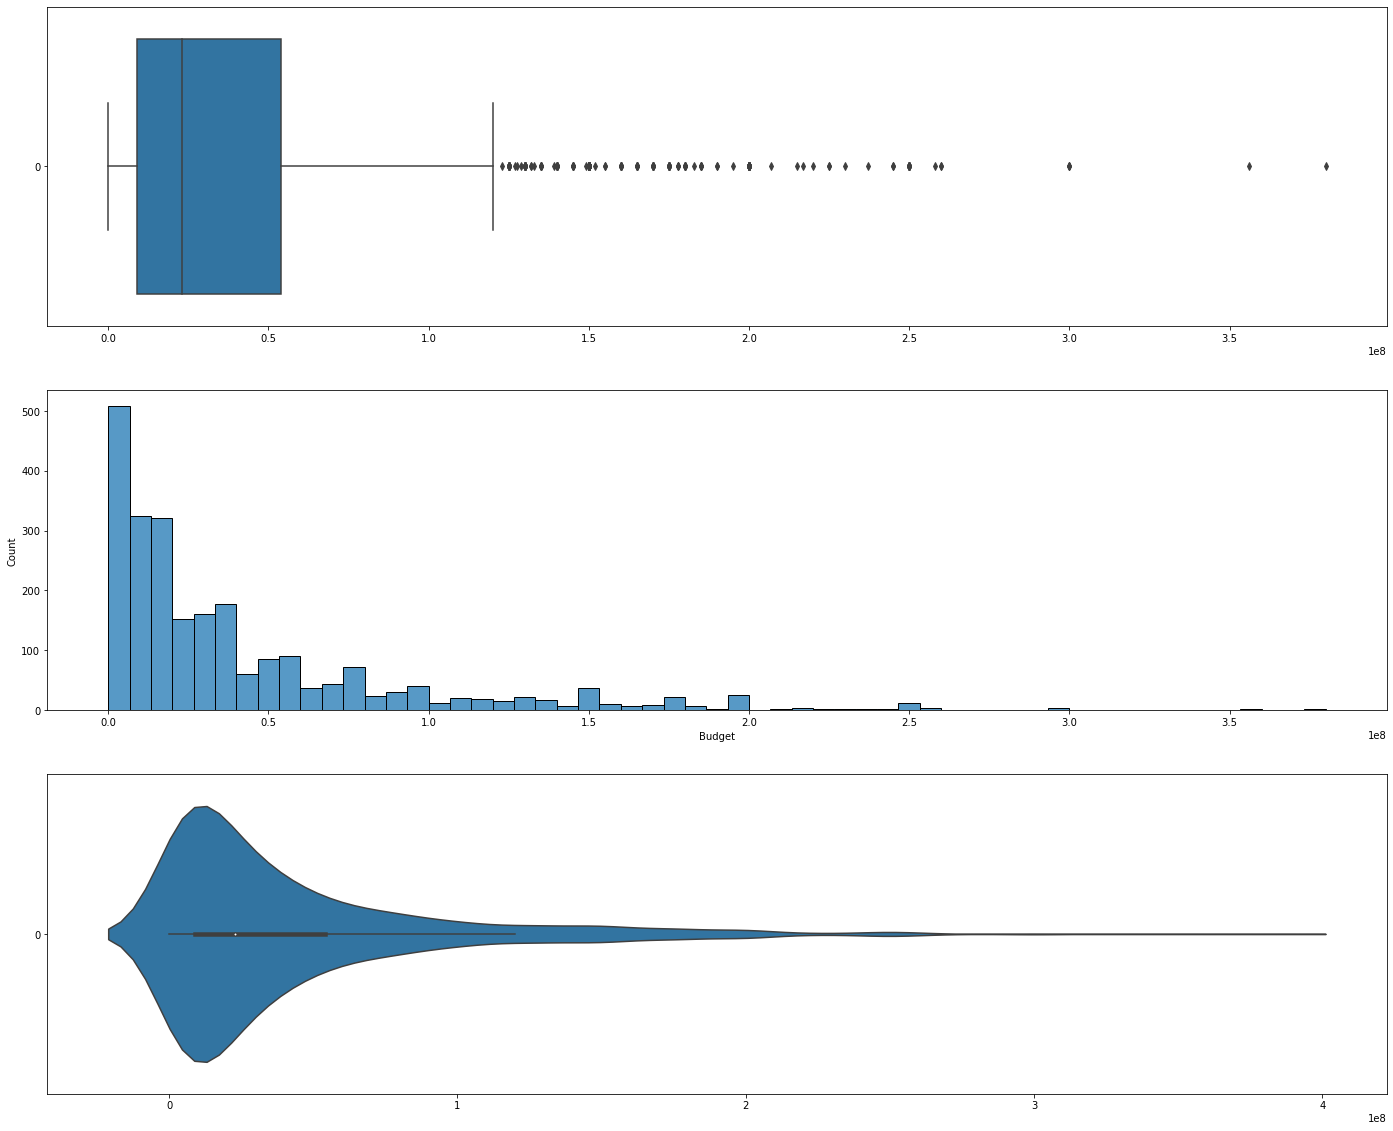

In [415]:
f, axes = plt.subplots(3, 1, figsize=(24, 20))
sb.boxplot(data = successMovieData['Budget'], orient = "h", ax = axes[0])
sb.histplot(data = successMovieData['Budget'], ax = axes[1])
sb.violinplot(data = successMovieData['Budget'], orient = "h", ax = axes[2])

In [416]:
successMovieData["Budget"].describe()

count    2.393000e+03
mean     4.154711e+07
std      5.011599e+07
min      3.000000e+01
25%      9.000000e+06
50%      2.300000e+07
75%      5.400000e+07
max      3.800000e+08
Name: Budget, dtype: float64

## 4. Visualising the Production Companies Data

In [417]:
top_com=[]
top_com = pd.DataFrame(successMovieData["Production_Companies"])
top_com = pd.DataFrame(successMovieData["Production_Companies"].value_counts(sort=True)[0:30])
top_com

,Production_Companies
Universal Pictures,138
Paramount,118
Columbia Pictures,80
Walt Disney Pictures,67
New Line Cinema,62
Warner Bros. Pictures,52
20th Century Fox,40
Touchstone Pictures,36
United Artists,30
DreamWorks Animation,27


### Since they are too many companies, we have decided to only display the top 30 companies.

### Total Number of Movies Released Per Company

Text(0.5, 1.0, 'Total Number of Movies Released Per Company')

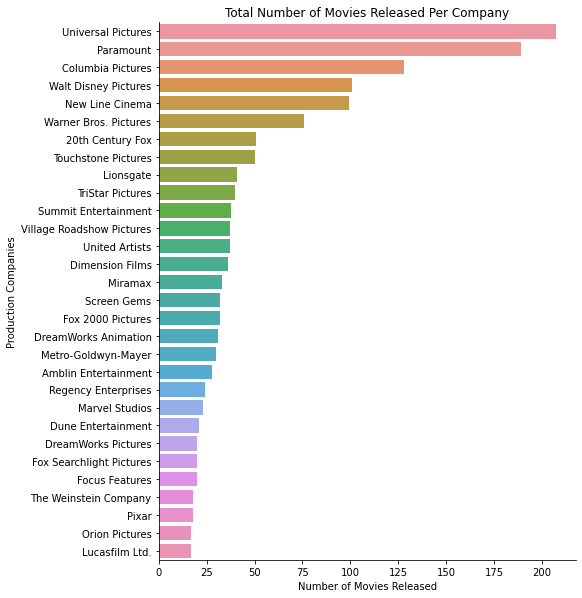

In [418]:
sb.catplot(y = 'Production_Companies', 
           data = totalMovieData,
           order = totalMovieData["Production_Companies"].value_counts(sort=True)[0:30].index, 
           kind = "count", 
           height = 8)
plt.ylabel("Production Companies")
plt.xlabel("Number of Movies Released")
plt.title("Total Number of Movies Released Per Company")

### Total Number of Successful Movies Released Per Company

Text(0.5, 1.0, 'Total Number of Successful Movies Released Per Company')

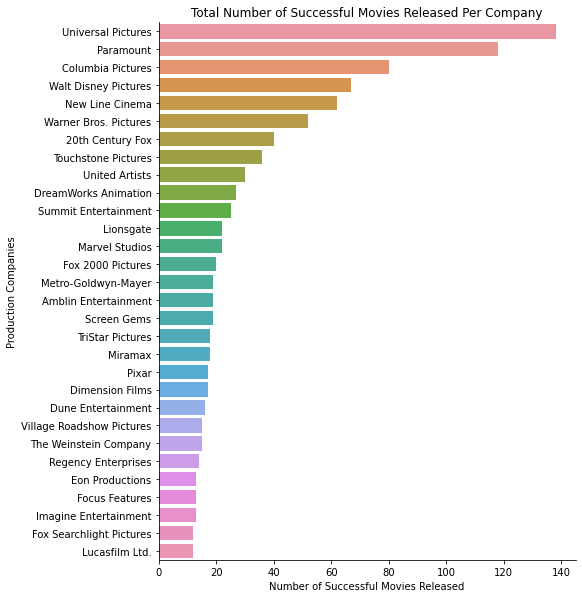

In [419]:
sb.catplot(y = 'Production_Companies', 
           data = successMovieData,
           order = successMovieData["Production_Companies"].value_counts(sort=True)[0:30].index, 
           kind = "count", 
           height = 8)
plt.ylabel("Production Companies")
plt.xlabel("Number of Successful Movies Released")
plt.title("Total Number of Successful Movies Released Per Company")

# Machine Learning

### We have decided to make a new column in our totalMovieData dataframe named "Successful" to assign whether movies are successful (Y) or unsuccessful (N).

In [420]:
data = []
for i in range(4316):
    try:
        if(totalMovieData['Revenue'][i] >= 2*totalMovieData['Budget'][i]):
            data.append('Y')
        else:
            data.append("N")
    except:
        pass
    
totalMovieData['Successful'] = data
totalMovieData['Successful'].value_counts(sort=True)

Y    2395
N    1921
Name: Successful, dtype: int64

In [421]:
totalMovieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month,Successful
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,Warner Bros. Pictures,2021-03-24,3,N
1,Monster Hunter,60000000.0,25814306.0,Fantasy,CAPCOM,2020-12-03,12,N
2,Tom & Jerry,50000000.0,66890000.0,Action,Warner Animation Group,2021-02-11,2,N
3,Wonder Woman 1984,200000000.0,165160000.0,Fantasy,DC Entertainment,2020-12-16,12,N
4,King Kong vs. Godzilla,12000.0,2700000.0,Science Fiction,"Toho Company, Ltd.",1963-06-26,6,Y


## 1. Predicting Successful using Release_Month

In [422]:
from sklearn.tree import DecisionTreeClassifier

dectree1 = DecisionTreeClassifier(max_depth = 2)

### Split the dataset in Train and Test sets, uniformly at random.      

    Train Set with 3021 samples and Test Set with 1295 samples.

In [423]:
from sklearn.model_selection import train_test_split


X = pd.DataFrame(totalMovieData['Release_Month'])
y = pd.DataFrame(totalMovieData['Successful'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (3021, 1) (3021, 1)
Test Set  : (1295, 1) (1295, 1)


### Fitting the Decision Tree Classifier model on the Train Dataset

In [424]:
dectree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### Visual Representation of the Decision Tree Model

[Text(334.8, 543.6, 'Release_Month <= 7.5\ngini = 0.493\nsamples = 3021\nvalue = [1333, 1688]\nclass = Y'),
 Text(167.4, 326.16, 'Release_Month <= 4.5\ngini = 0.48\nsamples = 1583\nvalue = [632, 951]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.494\nsamples = 837\nvalue = [373, 464]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.453\nsamples = 746\nvalue = [259, 487]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'Release_Month <= 10.5\ngini = 0.5\nsamples = 1438\nvalue = [701, 737]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.496\nsamples = 873\nvalue = [477, 396]\nclass = N'),
 Text(585.9, 108.72000000000003, 'gini = 0.479\nsamples = 565\nvalue = [224, 341]\nclass = Y')]

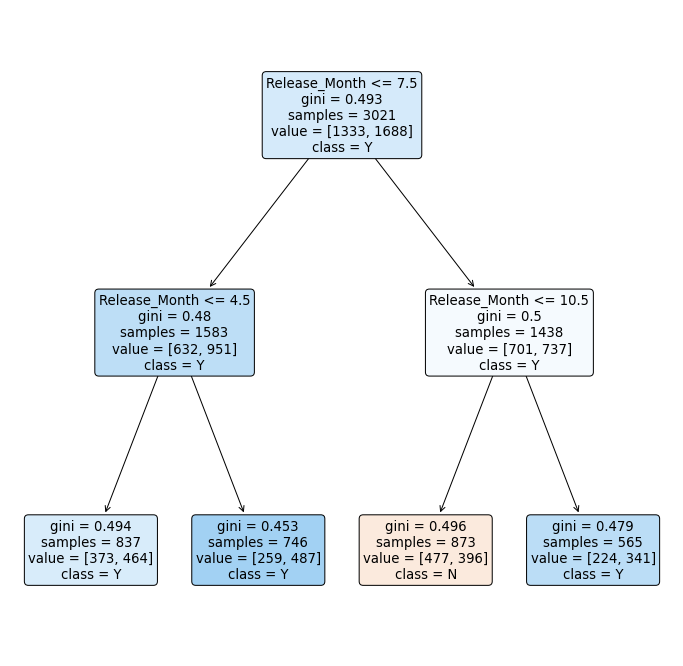

In [425]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

### Prediction on Train Data and Goodness of Fit

<AxesSubplot:>

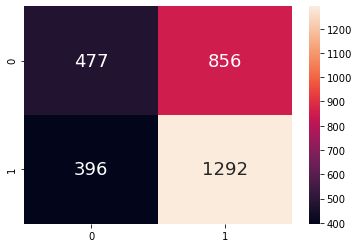

In [426]:
from sklearn.metrics import confusion_matrix

y_train_pred = dectree1.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [427]:
print("Release_Month Train Data")
print("Accuracy  :\t", dectree1.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Release_Month Train Data
Accuracy  :	 0.585567692816948

TPR Train :	 0.7654028436018957
TNR Train :	 0.35783945986496624

FPR Train :	 0.6421605401350338
FNR Train :	 0.23459715639810427


### Prediction on Test Data and Goodness of Fit

<AxesSubplot:>

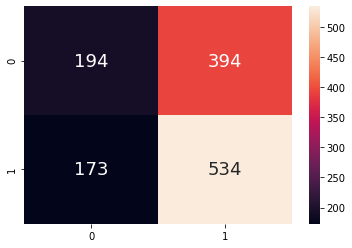

In [428]:
y_test_pred = dectree1.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [429]:
print("Release_Month Test Data")
print("Accuracy  :\t", dectree1.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Release_Month Test Data
Accuracy  :	 0.5621621621621622

TPR Test :	 0.7553041018387553
TNR Test :	 0.3299319727891156

FPR Test :	 0.6700680272108843
FNR Test :	 0.2446958981612447


## 2. Predicting Successful using Genre

### We decided to allocate each genre to a number as we realised that classification trees can only be used if the variable is a numeric value (even if it is categorical). Thus, the genres are numbered from 1 to 18, in ascending order according to the number of successful movies that were released by the genre. 
(refer to catplot above 'Total Number of Successsful Movies Released by Genre')

In [430]:
data=[]

for i in range(0,4316):
    if(totalMovieData['Genres'][i] == 'Comedy'):
        data.append(1)
    elif(totalMovieData['Genres'][i] == 'Drama'):
        data.append(2)
    elif(totalMovieData['Genres'][i] == 'Action'):
        data.append(3)
    elif(totalMovieData['Genres'][i] == 'Horror'):
        data.append(4)
    elif(totalMovieData['Genres'][i] == 'Adventure'):
        data.append(5)
    elif(totalMovieData['Genres'][i] == 'Crime'):
        data.append(6)
    elif(totalMovieData['Genres'][i] == 'Animation'):
        data.append(7)
    elif(totalMovieData['Genres'][i] == 'Thriller'):
        data.append(8)
    elif(totalMovieData['Genres'][i] == 'Fantasy'):
        data.append(9)
    elif(totalMovieData['Genres'][i] == 'Science Fiction'):
        data.append(10)
    elif(totalMovieData['Genres'][i] == 'Family'):
        data.append(11)
    elif(totalMovieData['Genres'][i] == 'Romance'):
        data.append(12)
    elif(totalMovieData['Genres'][i] == 'Mystery'):
        data.append(13)
    elif(totalMovieData['Genres'][i] == 'Western'):
        data.append(14)
    elif(totalMovieData['Genres'][i] == 'Music'):
        data.append(15)
    elif(totalMovieData['Genres'][i] == 'History'):
        data.append(16)
    elif(totalMovieData['Genres'][i] == 'Documentary'):
        data.append(17)
    elif(totalMovieData['Genres'][i] == 'War'):
        data.append(18)
    else:
        pass
        
totalMovieData['Genre_Number'] = data

totalMovieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month,Successful,Genre_Number
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,Warner Bros. Pictures,2021-03-24,3,N,3
1,Monster Hunter,60000000.0,25814306.0,Fantasy,CAPCOM,2020-12-03,12,N,9
2,Tom & Jerry,50000000.0,66890000.0,Action,Warner Animation Group,2021-02-11,2,N,3
3,Wonder Woman 1984,200000000.0,165160000.0,Fantasy,DC Entertainment,2020-12-16,12,N,9
4,King Kong vs. Godzilla,12000.0,2700000.0,Science Fiction,"Toho Company, Ltd.",1963-06-26,6,Y,10


In [431]:
dectree2 = DecisionTreeClassifier(max_depth = 3)

### Split the dataset in Train and Test sets, uniformly at random.      
Train Set with 3021 samples and Test Set with 1295 samples.

In [432]:
X2 = pd.DataFrame(totalMovieData['Genre_Number'])
y2 = pd.DataFrame(totalMovieData['Successful'])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3)

print("Train Set :", X2_train.shape, y2_train.shape)
print("Test Set  :", X2_test.shape, y2_test.shape)

Train Set : (3021, 1) (3021, 1)
Test Set  : (1295, 1) (1295, 1)


### Fitting the Decision Tree Classifier model on the Train Dataset  

In [433]:
dectree2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=3)

### Visual Representation of the Decision Tree Model

[Text(251.10000000000002, 570.7800000000001, 'Genre_Number <= 1.5\ngini = 0.492\nsamples = 3021\nvalue = [1321, 1700]\nclass = Y'),
 Text(167.4, 407.70000000000005, 'gini = 0.475\nsamples = 518\nvalue = [201, 317]\nclass = Y'),
 Text(334.8, 407.70000000000005, 'Genre_Number <= 3.5\ngini = 0.494\nsamples = 2503\nvalue = [1120, 1383]\nclass = Y'),
 Text(167.4, 244.62, 'Genre_Number <= 2.5\ngini = 0.498\nsamples = 1160\nvalue = [545, 615]\nclass = Y'),
 Text(83.7, 81.53999999999996, 'gini = 0.498\nsamples = 605\nvalue = [282, 323]\nclass = Y'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.499\nsamples = 555\nvalue = [263, 292]\nclass = Y'),
 Text(502.20000000000005, 244.62, 'Genre_Number <= 4.5\ngini = 0.49\nsamples = 1343\nvalue = [575, 768]\nclass = Y'),
 Text(418.5, 81.53999999999996, 'gini = 0.448\nsamples = 254\nvalue = [86, 168]\nclass = Y'),
 Text(585.9, 81.53999999999996, 'gini = 0.495\nsamples = 1089\nvalue = [489, 600]\nclass = Y')]

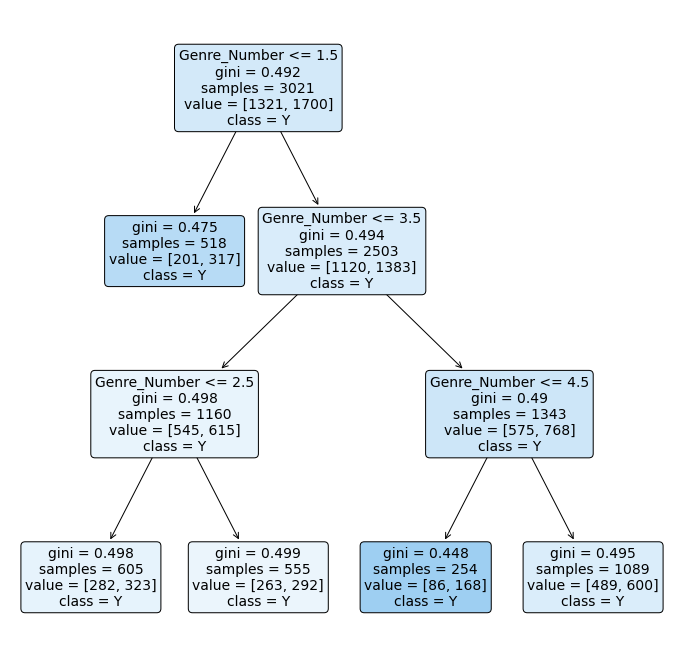

In [434]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=X2_train.columns, 
          class_names=["N","Y"])

### Prediction on Train Data and Goodness of Fit

<AxesSubplot:>

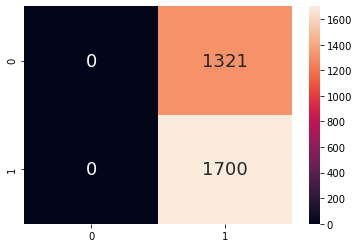

In [435]:
y2_train_pred = dectree2.predict(X2_train)

sb.heatmap(confusion_matrix(y2_train, y2_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [436]:
print("Genre_Number Train Data")
print("Accuracy  :\t", dectree2.score(X2_train, y2_train))
print()

cmTrain = confusion_matrix(y2_train, y2_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Genre_Number Train Data
Accuracy  :	 0.5627275736511089

TPR Train :	 1.0
TNR Train :	 0.0

FPR Train :	 1.0
FNR Train :	 0.0


### Prediction on Test Data and Goodness of Fit

<AxesSubplot:>

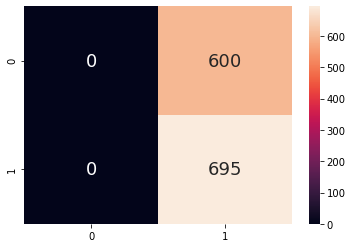

In [437]:
y2_test_pred = dectree2.predict(X2_test)

sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [438]:
print("Genre_Number Test Data")
print("Accuracy  :\t", dectree2.score(X2_test, y2_test))
print()

cmTest = confusion_matrix(y2_test, y2_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Genre_Number Test Data
Accuracy  :	 0.5366795366795367

TPR Test :	 1.0
TNR Test :	 0.0

FPR Test :	 1.0
FNR Test :	 0.0


## 3. Predicting Successful using Budget

### Split the dataset in Train and Test sets, uniformly at random.      
Train Set with 3021 samples and Test Set with 1295 samples.

In [439]:
dectree3 = DecisionTreeClassifier(max_depth = 2)

In [440]:
X = pd.DataFrame(totalMovieData['Budget'])
y = pd.DataFrame(totalMovieData['Successful'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape) 

Train Set : (3021, 1) (3021, 1)
Test Set  : (1295, 1) (1295, 1)


### Fitting the Decision Tree Classifier model on the Train Dataset. 

In [441]:
dectree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### Visual Representation of the Decision Tree Model

[Text(334.8, 543.6, 'Budget <= 4150000.0\ngini = 0.491\nsamples = 3021\nvalue = [1311, 1710]\nclass = Y'),
 Text(167.4, 326.16, 'Budget <= 29.0\ngini = 0.415\nsamples = 361\nvalue = [106, 255]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.408\nsamples = 357\nvalue = [102, 255]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'Budget <= 101000000.0\ngini = 0.496\nsamples = 2660\nvalue = [1205, 1455]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.498\nsamples = 2387\nvalue = [1127, 1260]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.408\nsamples = 273\nvalue = [78, 195]\nclass = Y')]

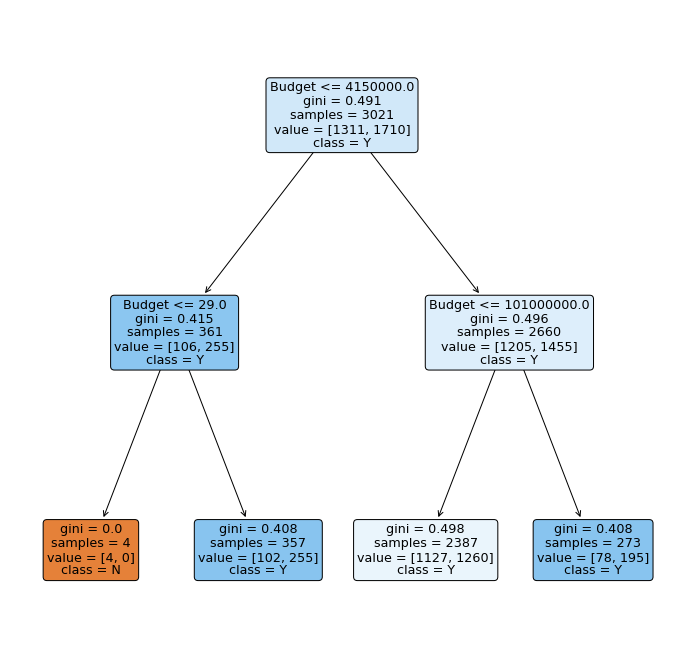

In [442]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

### Prediction on Train Data and Goodness of Fit

<AxesSubplot:>

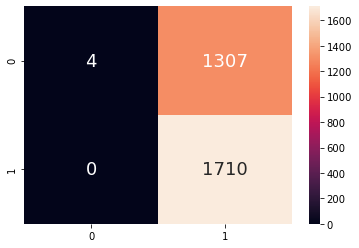

In [443]:
y_train_pred = dectree3.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [444]:
print("Budget Train Data")
print("Accuracy  :\t", dectree3.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Budget Train Data
Accuracy  :	 0.5673618007282357

TPR Train :	 1.0
TNR Train :	 0.0030511060259344014

FPR Train :	 0.9969488939740656
FNR Train :	 0.0


### Prediction on Test Data and Goodness of Fit

<AxesSubplot:>

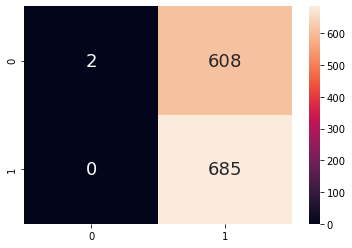

In [445]:
y_test_pred = dectree3.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [446]:
print("Budget Test Data")
print("Accuracy  :\t", dectree3.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Budget Test Data
Accuracy  :	 0.5305019305019305

TPR Test :	 1.0
TNR Test :	 0.003278688524590164

FPR Test :	 0.9967213114754099
FNR Test :	 0.0


## 4. Predicting Successful using Production Companies

In [447]:
data=[]

proMovieData = pd.DataFrame(totalMovieData)

for i in range(0,4316):
    if(proMovieData['Production_Companies'][i] == 'Universal Pictures'):
        data.append(1)
    elif(proMovieData['Production_Companies'][i] == 'Paramount'):
        data.append(2)
    elif(proMovieData['Production_Companies'][i] == 'Columbia Pictures'):
        data.append(3)
    elif(proMovieData['Production_Companies'][i] == 'Walt Disney Pictures'):
        data.append(4)
    elif(proMovieData['Production_Companies'][i] == 'New Line Cinema'):
        data.append(5)
    elif(proMovieData['Production_Companies'][i] == 'Warner Bros. Pictures'):
        data.append(6)
    elif(proMovieData['Production_Companies'][i] == '20th Century Fox'):
        data.append(7)
    elif(proMovieData['Production_Companies'][i] == 'Touchstone Pictures'):
        data.append(8)
    elif(proMovieData['Production_Companies'][i] == 'United Artists'):
        data.append(9)
    elif(proMovieData['Production_Companies'][i] == 'DreamWorks Animation'):
        data.append(10)
    elif(proMovieData['Production_Companies'][i] == 'Summit Entertainment'):
        data.append(11)
    elif(proMovieData['Production_Companies'][i] == 'Lionsgate'):
        data.append(12)
    elif(proMovieData['Production_Companies'][i] == 'Marvel Studios'):
        data.append(13)
    elif(proMovieData['Production_Companies'][i] == 'Fox 2000 Pictures'):
        data.append(14)
    elif(proMovieData['Production_Companies'][i] == 'Metro-Goldwyn-Mayer'):
        data.append(15)
    elif(proMovieData['Production_Companies'][i] == 'Amblin Entertainment'):
        data.append(16)
    elif(proMovieData['Production_Companies'][i] == 'Screen Gems'):
        data.append(17)
    elif(proMovieData['Production_Companies'][i] == 'Miramax'):
        data.append(18)
    elif(proMovieData['Production_Companies'][i] == 'TriStar Pictures'):
        data.append(19)
    elif(proMovieData['Production_Companies'][i] == 'Dimension Films'):
        data.append(20)
    elif(proMovieData['Production_Companies'][i] == 'Pixar'):
        data.append(21)
    elif(proMovieData['Production_Companies'][i] == 'Dune Entertainment'):
        data.append(22)
    elif(proMovieData['Production_Companies'][i] == 'Village Roadshow Pictures'):
        data.append(23)
    elif(proMovieData['Production_Companies'][i] == 'The Weinstein Company'):
        data.append(24)
    elif(proMovieData['Production_Companies'][i] == 'Regency Enterprises'):
        data.append(25)
    elif(proMovieData['Production_Companies'][i] == 'Eon Productions'):
        data.append(26)
    elif(proMovieData['Production_Companies'][i] == 'Imagine Entertainment'):
        data.append(27)
    elif(proMovieData['Production_Companies'][i] == 'Focus Features'):
        data.append(28)
    elif(proMovieData['Production_Companies'][i] == 'Lucasfilm Ltd.'):
        data.append(29)
    elif(proMovieData['Production_Companies'][i] == 'Fox Searchlight Pictures'):
        data.append(30)
    else:
        data.append(np.nan)
        
proMovieData['Production_Companies_Number'] = data

proMovieData = proMovieData.dropna()
        
proMovieData = proMovieData.reset_index(drop=True) # to reorder the index

totalMovieData = totalMovieData.drop(columns=["Production_Companies_Number"])  

In [448]:
proMovieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month,Successful,Genre_Number,Production_Companies_Number
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,Warner Bros. Pictures,2021-03-24,3,N,3,6.0
1,The Little Things,30000000.0,23205000.0,Thriller,Warner Bros. Pictures,2021-01-28,1,N,8,6.0
2,The Croods: A New Age,65000000.0,135076090.0,Family,Universal Pictures,2020-11-25,11,Y,11,1.0
3,Soul,150000000.0,57400000.0,Family,Walt Disney Pictures,2020-12-25,12,N,11,4.0
4,Bad Boys for Life,90000000.0,426505244.0,Thriller,Columbia Pictures,2020-01-15,1,Y,8,3.0


In [449]:
dectree5= DecisionTreeClassifier(max_depth = 3)

In [450]:
X = pd.DataFrame(proMovieData['Production_Companies_Number'])
y = pd.DataFrame(proMovieData['Successful'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1054, 1) (1054, 1)
Test Set  : (452, 1) (452, 1)


In [451]:
dectree5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(639.375, 1189.125, 'Production_Companies_Number <= 13.5\ngini = 0.446\nsamples = 1054\nvalue = [354, 700]\nclass = Y'),
 Text(348.75, 849.375, 'Production_Companies_Number <= 12.5\ngini = 0.433\nsamples = 747\nvalue = [237, 510]\nclass = Y'),
 Text(232.5, 509.625, 'Production_Companies_Number <= 7.5\ngini = 0.438\nsamples = 729\nvalue = [236, 493]\nclass = Y'),
 Text(116.25, 169.875, 'gini = 0.446\nsamples = 585\nvalue = [196, 389]\nclass = Y'),
 Text(348.75, 169.875, 'gini = 0.401\nsamples = 144\nvalue = [40, 104]\nclass = Y'),
 Text(465.0, 509.625, 'gini = 0.105\nsamples = 18\nvalue = [1, 17]\nclass = Y'),
 Text(930.0, 849.375, 'Production_Companies_Number <= 20.5\ngini = 0.472\nsamples = 307\nvalue = [117, 190]\nclass = Y'),
 Text(697.5, 509.625, 'Production_Companies_Number <= 17.5\ngini = 0.492\nsamples = 160\nvalue = [70, 90]\nclass = Y'),
 Text(581.25, 169.875, 'gini = 0.466\nsamples = 81\nvalue = [30, 51]\nclass = Y'),
 Text(813.75, 169.875, 'gini = 0.5\nsamples = 79\nval

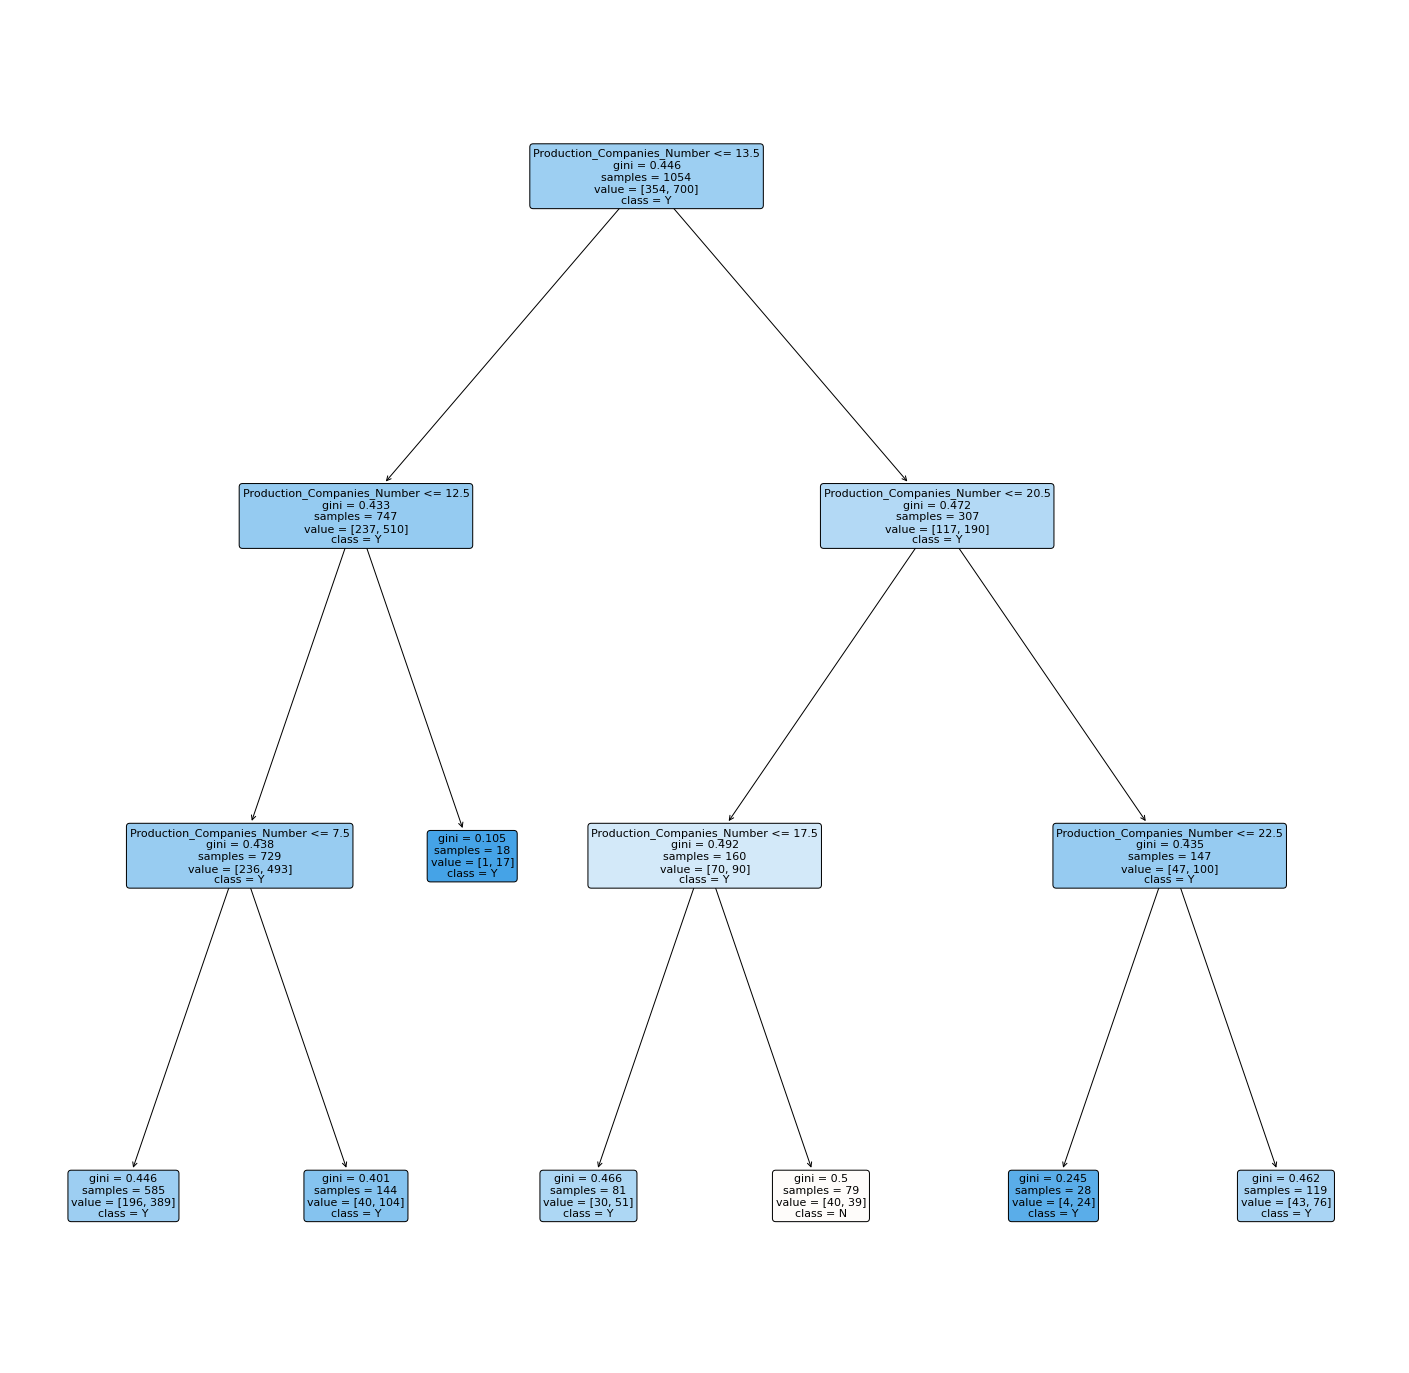

In [452]:
f = plt.figure(figsize=(25,25))
plot_tree(dectree5, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

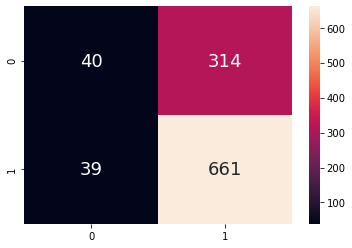

In [453]:
y_train_pred = dectree5.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [454]:
print("Production_Companies Train Data")
print("Accuracy  :\t", dectree5.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Production_Companies Train Data
Accuracy  :	 0.6650853889943074

TPR Train :	 0.9442857142857143
TNR Train :	 0.11299435028248588

FPR Train :	 0.8870056497175142
FNR Train :	 0.055714285714285716


<AxesSubplot:>

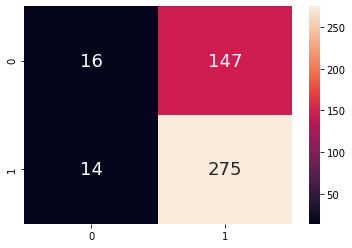

In [455]:
y_test_pred = dectree5.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [456]:
print("Production_Companies Test Data")
print("Accuracy  :\t", dectree5.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1]
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Production_Companies Test Data
Accuracy  :	 0.6438053097345132

TPR Test :	 0.9515570934256056
TNR Test :	 0.09815950920245399

FPR Test :	 0.901840490797546
FNR Test :	 0.04844290657439446


# Improving the model

    After consulting our TA, we decided to make some improvements:
    
    1. We decided to undersample the data such that the number of entries in "Y" and "N" in the Successful column are equal.
    This is to remedy the skewed results shown in the previous models as there was a high frequency of False Positive and 
    low frequency of True Negative.
    
    2. One-Hot method for Genre and Production Companies 

In [457]:
j=0
for i in range(0,4316):
    if totalMovieData["Successful"][i] == 'Y':
        totalMovieData["Successful"][i] = np.nan
        j+=1
        if(j > 473):
            break
                
totalMovieData = totalMovieData.dropna()
totalMovieData = totalMovieData.reset_index(drop=True)

totalMovieData['Successful'].value_counts(sort=True)

<ipython-input-457-ada1ace47678>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalMovieData["Successful"][i] = np.nan


Y    1921
N    1921
Name: Successful, dtype: int64

In [458]:
totalMovieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month,Successful,Genre_Number
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,Warner Bros. Pictures,2021-03-24,3,N,3
1,Monster Hunter,60000000.0,25814306.0,Fantasy,CAPCOM,2020-12-03,12,N,9
2,Tom & Jerry,50000000.0,66890000.0,Action,Warner Animation Group,2021-02-11,2,N,3
3,Wonder Woman 1984,200000000.0,165160000.0,Fantasy,DC Entertainment,2020-12-16,12,N,9
4,The Little Things,30000000.0,23205000.0,Thriller,Warner Bros. Pictures,2021-01-28,1,N,8


## 1. Improved Release_Month Classification 

In [459]:
dectree9 = DecisionTreeClassifier(max_depth = 2)

In [460]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(totalMovieData['Release_Month'])
y = pd.DataFrame(totalMovieData['Successful'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2689, 1) (2689, 1)
Test Set  : (1153, 1) (1153, 1)


In [461]:
dectree9.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'Release_Month <= 7.5\ngini = 0.5\nsamples = 2689\nvalue = [1353, 1336]\nclass = N'),
 Text(167.4, 326.16, 'Release_Month <= 4.5\ngini = 0.499\nsamples = 1399\nvalue = [663, 736]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.499\nsamples = 755\nvalue = [393, 362]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.487\nsamples = 644\nvalue = [270, 374]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'Release_Month <= 10.5\ngini = 0.498\nsamples = 1290\nvalue = [690, 600]\nclass = N'),
 Text(418.5, 108.72000000000003, 'gini = 0.485\nsamples = 803\nvalue = [471, 332]\nclass = N'),
 Text(585.9, 108.72000000000003, 'gini = 0.495\nsamples = 487\nvalue = [219, 268]\nclass = Y')]

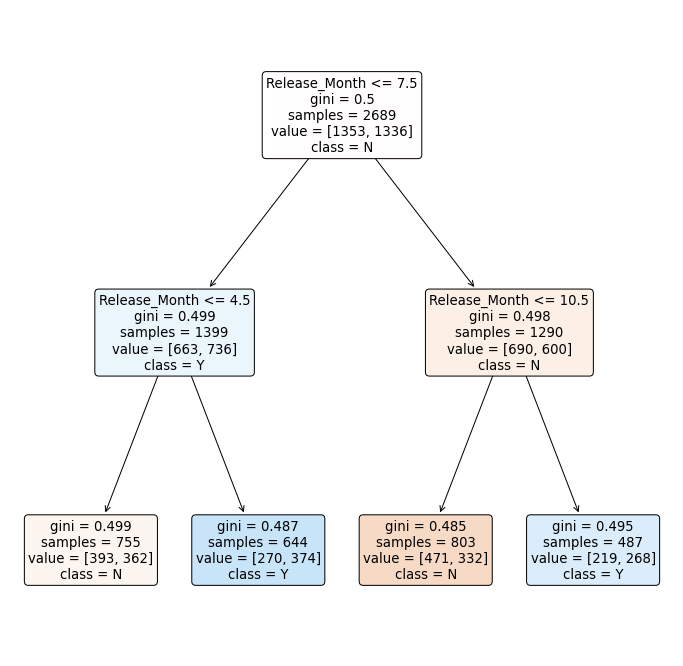

In [462]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree9, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

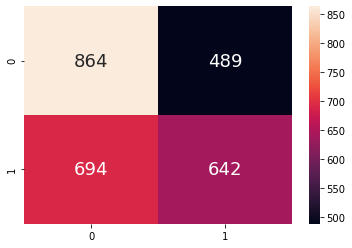

In [463]:
from sklearn.metrics import confusion_matrix

y_train_pred = dectree9.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [464]:
print("Improved Release_Month Train Data")
print("Accuracy  :\t", dectree9.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Improved Release_Month Train Data
Accuracy  :	 0.5600595016734846

TPR Train :	 0.4805389221556886
TNR Train :	 0.6385809312638581

FPR Train :	 0.3614190687361419
FNR Train :	 0.5194610778443114


<AxesSubplot:>

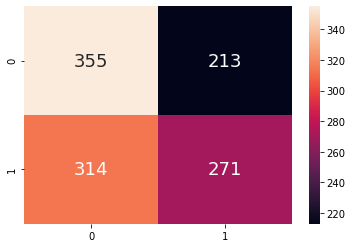

In [465]:
y_test_pred = dectree9.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [466]:
print("Improved Release_Month Test Data")
print("Accuracy  :\t", dectree9.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Improved Release_Month Test Data
Accuracy  :	 0.5429314830875975

TPR Test :	 0.46324786324786327
TNR Test :	 0.625

FPR Test :	 0.375
FNR Test :	 0.5367521367521367


## 2. Improved Genre Classification 

In [467]:
lst=totalMovieData.Genres.value_counts().sort_values(ascending=False).index 
lst2=list(lst)
import numpy as np
for categories in lst2:
    totalMovieData[categories]=np.where(totalMovieData['Genres']==categories,1,0)

totalMovieData.sample(5)

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month,Successful,Genre_Number,Drama,...,Fantasy,Animation,Romance,Family,Mystery,Music,Western,History,War,Documentary
400,The Godfather: Part III,54000000.0,136766062.0,Crime,Paramount,1990-12-25,12,Y,6,0,...,0,0,0,0,0,0,0,0,0,0
1995,Happily N'Ever After,47000000.0,38085778.0,Adventure,Vanguard Films,2007-01-05,1,N,5,0,...,0,0,0,0,0,0,0,0,0,0
578,功夫,20000000.0,101434304.0,Action,Star Overseas,2004-02-10,2,Y,3,0,...,0,0,0,0,0,0,0,0,0,0
3570,In the Name of the Father,13000000.0,65796862.0,Drama,Universal Pictures,1993-12-12,12,Y,2,1,...,0,0,0,0,0,0,0,0,0,0
1106,The Terminal,60000000.0,219417255.0,Comedy,Amblin Entertainment,2004-06-17,6,Y,1,0,...,0,0,0,0,0,0,0,0,0,0


In [468]:
dectree4 = DecisionTreeClassifier(max_depth = 18)

In [469]:
X = pd.DataFrame(totalMovieData[['Comedy','Drama','Action', 'Horror','Adventure','Crime','Animation','Thriller','Fantasy','Science Fiction','Family','Romance','Mystery','Western','Music','History','Documentary','War']])
y = pd.DataFrame(totalMovieData['Successful'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2689, 18) (2689, 1)
Test Set  : (1153, 18) (1153, 1)


In [470]:
dectree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18)

[Text(1004.4, 1057.0, 'Comedy <= 0.5\ngini = 0.5\nsamples = 2689\nvalue = [1347, 1342]\nclass = N'),
 Text(948.5999999999999, 996.6, 'Horror <= 0.5\ngini = 0.499\nsamples = 2162\nvalue = [1125, 1037]\nclass = N'),
 Text(892.8, 936.2, 'Thriller <= 0.5\ngini = 0.498\nsamples = 1937\nvalue = [1035, 902]\nclass = N'),
 Text(837.0, 875.8, 'Action <= 0.5\ngini = 0.499\nsamples = 1814\nvalue = [956, 858]\nclass = N'),
 Text(781.1999999999999, 815.4000000000001, 'War <= 0.5\ngini = 0.5\nsamples = 1333\nvalue = [678, 655]\nclass = N'),
 Text(725.4, 755.0, 'Western <= 0.5\ngini = 0.5\nsamples = 1316\nvalue = [664, 652]\nclass = N'),
 Text(669.5999999999999, 694.6, 'Documentary <= 0.5\ngini = 0.5\nsamples = 1299\nvalue = [659, 640]\nclass = N'),
 Text(613.8, 634.2, 'Romance <= 0.5\ngini = 0.5\nsamples = 1291\nvalue = [657, 634]\nclass = N'),
 Text(558.0, 573.8, 'Crime <= 0.5\ngini = 0.5\nsamples = 1233\nvalue = [623, 610]\nclass = N'),
 Text(502.2, 513.4, 'Animation <= 0.5\ngini = 0.5\nsamples = 

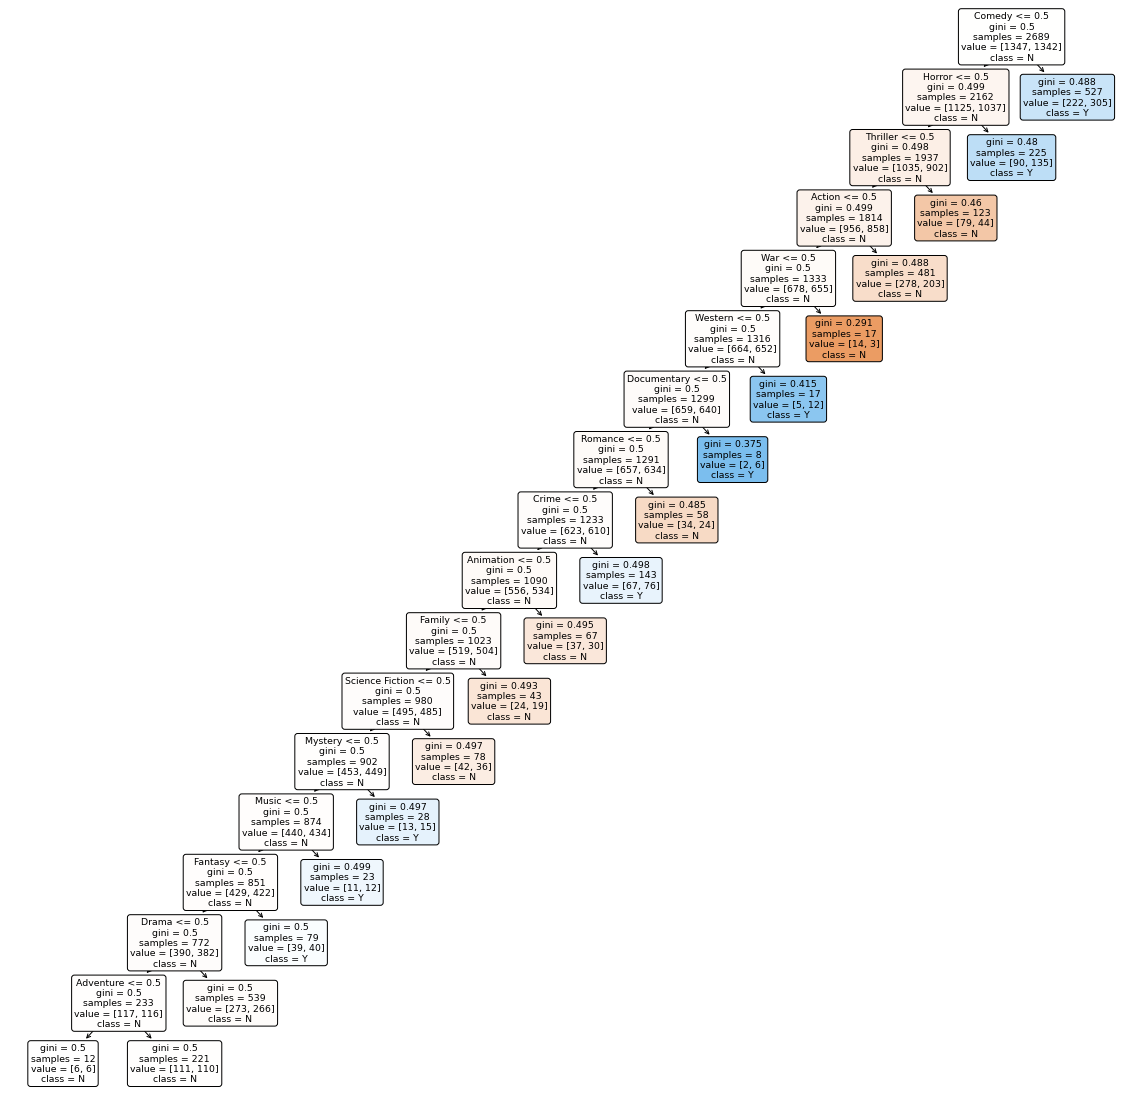

In [471]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

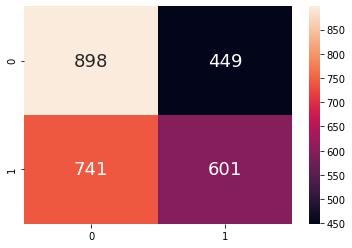

In [472]:
y_train_pred = dectree4.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [473]:
print("Improved Genre Train Data")
print("Accuracy  :\t", dectree4.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Improved Genre Train Data
Accuracy  :	 0.5574563034585348

TPR Train :	 0.44783904619970194
TNR Train :	 0.6666666666666666

FPR Train :	 0.3333333333333333
FNR Train :	 0.5521609538002981


<AxesSubplot:>

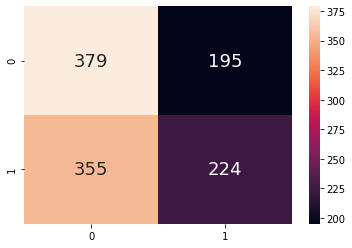

In [474]:
y_test_pred = dectree4.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [475]:
print("Improved Genre Test Data")
print("Accuracy  :\t", dectree4.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Improved Genre Test Data
Accuracy  :	 0.5229835212489159

TPR Test :	 0.38687392055267705
TNR Test :	 0.6602787456445993

FPR Test :	 0.3397212543554007
FNR Test :	 0.613126079447323


## 3. Improved Budget Classification

In [476]:
dectree8 = DecisionTreeClassifier(max_depth = 2)

In [477]:
X = pd.DataFrame(totalMovieData['Budget'])
y = pd.DataFrame(totalMovieData['Successful'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape) 

Train Set : (2689, 1) (2689, 1)
Test Set  : (1153, 1) (1153, 1)


In [478]:
dectree8.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'Budget <= 6000100.0\ngini = 0.5\nsamples = 2689\nvalue = [1356, 1333]\nclass = N'),
 Text(167.4, 326.16, 'Budget <= 1165355.0\ngini = 0.458\nsamples = 472\nvalue = [168, 304]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.313\nsamples = 98\nvalue = [19, 79]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.479\nsamples = 374\nvalue = [149, 225]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'Budget <= 18750000.0\ngini = 0.497\nsamples = 2217\nvalue = [1188, 1029]\nclass = N'),
 Text(418.5, 108.72000000000003, 'gini = 0.499\nsamples = 676\nvalue = [321, 355]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.492\nsamples = 1541\nvalue = [867, 674]\nclass = N')]

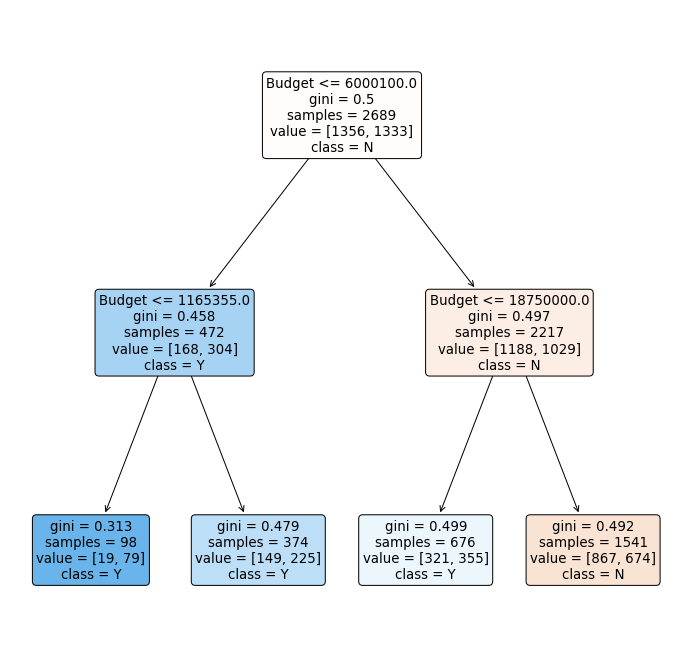

In [479]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree8, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

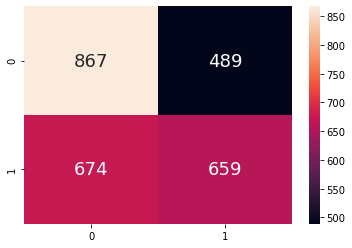

In [480]:
y_train_pred = dectree8.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [481]:
print("Improved Budget Train Data")
print("Accuracy  :\t", dectree8.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Improved Budget Train Data
Accuracy  :	 0.5674972108590554

TPR Train :	 0.4943735933983496
TNR Train :	 0.6393805309734514

FPR Train :	 0.3606194690265487
FNR Train :	 0.5056264066016504


<AxesSubplot:>

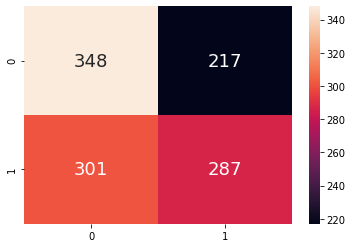

In [482]:
y_test_pred = dectree8.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [483]:
print("Improved Budget Test Data")
print("Accuracy  :\t", dectree8.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Improved Budget Test Data
Accuracy  :	 0.5507372072853426

TPR Test :	 0.4880952380952381
TNR Test :	 0.6159292035398231

FPR Test :	 0.384070796460177
FNR Test :	 0.5119047619047619


## 4. Improved Production_Companies Classification

In [484]:
j=0
for i in range(0,1506):
    if proMovieData["Successful"][i] == 'Y':
        proMovieData["Successful"][i] = np.nan
        j+=1
        if(j > 471):
            break
                
proMovieData = proMovieData.dropna()
proMovieData = proMovieData.reset_index(drop=True)

proMovieData['Successful'].value_counts(sort=True)

<ipython-input-484-ff20ca0cd02d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proMovieData["Successful"][i] = np.nan


Y    517
N    517
Name: Successful, dtype: int64

In [485]:
lst=proMovieData.Production_Companies.value_counts().sort_values(ascending=False).index 
lst2=list(lst)
import numpy as np
for categories in lst2:
    proMovieData[categories]=np.where(proMovieData['Production_Companies']==categories,1,0)
proMovieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month,Successful,Genre_Number,Production_Companies_Number,...,Fox Searchlight Pictures,The Weinstein Company,Focus Features,Dune Entertainment,Imagine Entertainment,Eon Productions,Lucasfilm Ltd.,DreamWorks Animation,Marvel Studios,Pixar
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,Warner Bros. Pictures,2021-03-24,3,N,3,6.0,...,0,0,0,0,0,0,0,0,0,0
1,The Little Things,30000000.0,23205000.0,Thriller,Warner Bros. Pictures,2021-01-28,1,N,8,6.0,...,0,0,0,0,0,0,0,0,0,0
2,Soul,150000000.0,57400000.0,Family,Walt Disney Pictures,2020-12-25,12,N,11,4.0,...,0,0,0,0,0,0,0,0,0,0
3,Mulan,200000000.0,57000000.0,Adventure,Walt Disney Pictures,2020-09-04,9,N,5,4.0,...,0,0,0,0,0,0,0,0,0,0
4,Dark Phoenix,200000000.0,252442974.0,Science Fiction,20th Century Fox,2019-06-05,6,N,10,7.0,...,0,0,0,0,0,0,0,0,0,0


In [486]:
dectree6 = DecisionTreeClassifier(max_depth = 30) 

In [487]:
X = pd.DataFrame(proMovieData[['Universal Pictures',
                               'Paramount',
                               'Columbia Pictures',
                               'Walt Disney Pictures',
                               'New Line Cinema',
                               'Warner Bros. Pictures',
                               '20th Century Fox',
                               'Touchstone Pictures',
                               'United Artists',
                               'DreamWorks Animation',
                               'Summit Entertainment',
                               'Lionsgate',
                               'Marvel Studios',
                               'Fox 2000 Pictures',
                               'Metro-Goldwyn-Mayer',
                               'Amblin Entertainment',
                               'Screen Gems',
                               'Miramax',
                               'TriStar Pictures',
                               'Dimension Films',
                               'Pixar',
                               'Dune Entertainment',
                               'Village Roadshow Pictures',
                               'The Weinstein Company',
                               'Regency Enterprises',
                               'Eon Productions',
                               'Imagine Entertainment',
                               'Focus Features',
                               'Lucasfilm Ltd.', 
                               'Fox Searchlight Pictures']])

y = pd.DataFrame(proMovieData['Successful'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (723, 30) (723, 1)
Test Set  : (311, 30) (311, 1)


In [488]:
dectree6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

[Text(1830.9375, 1870.8899999999999, 'Village Roadshow Pictures <= 0.5\ngini = 0.5\nsamples = 723\nvalue = [358, 365]\nclass = Y'),
 Text(1769.90625, 1807.4699999999998, 'Eon Productions <= 0.5\ngini = 0.5\nsamples = 702\nvalue = [340, 362]\nclass = Y'),
 Text(1708.875, 1744.05, '20th Century Fox <= 0.5\ngini = 0.5\nsamples = 693\nvalue = [340, 353]\nclass = Y'),
 Text(1647.84375, 1680.6299999999999, 'Universal Pictures <= 0.5\ngini = 0.5\nsamples = 670\nvalue = [335, 335]\nclass = N'),
 Text(1586.8125, 1617.21, 'United Artists <= 0.5\ngini = 0.499\nsamples = 563\nvalue = [294, 269]\nclass = N'),
 Text(1525.78125, 1553.79, 'Summit Entertainment <= 0.5\ngini = 0.498\nsamples = 543\nvalue = [289, 254]\nclass = N'),
 Text(1464.75, 1490.37, 'Imagine Entertainment <= 0.5\ngini = 0.499\nsamples = 530\nvalue = [278, 252]\nclass = N'),
 Text(1403.71875, 1426.9499999999998, 'Touchstone Pictures <= 0.5\ngini = 0.498\nsamples = 523\nvalue = [277, 246]\nclass = N'),
 Text(1342.6875, 1363.53, 'Drea

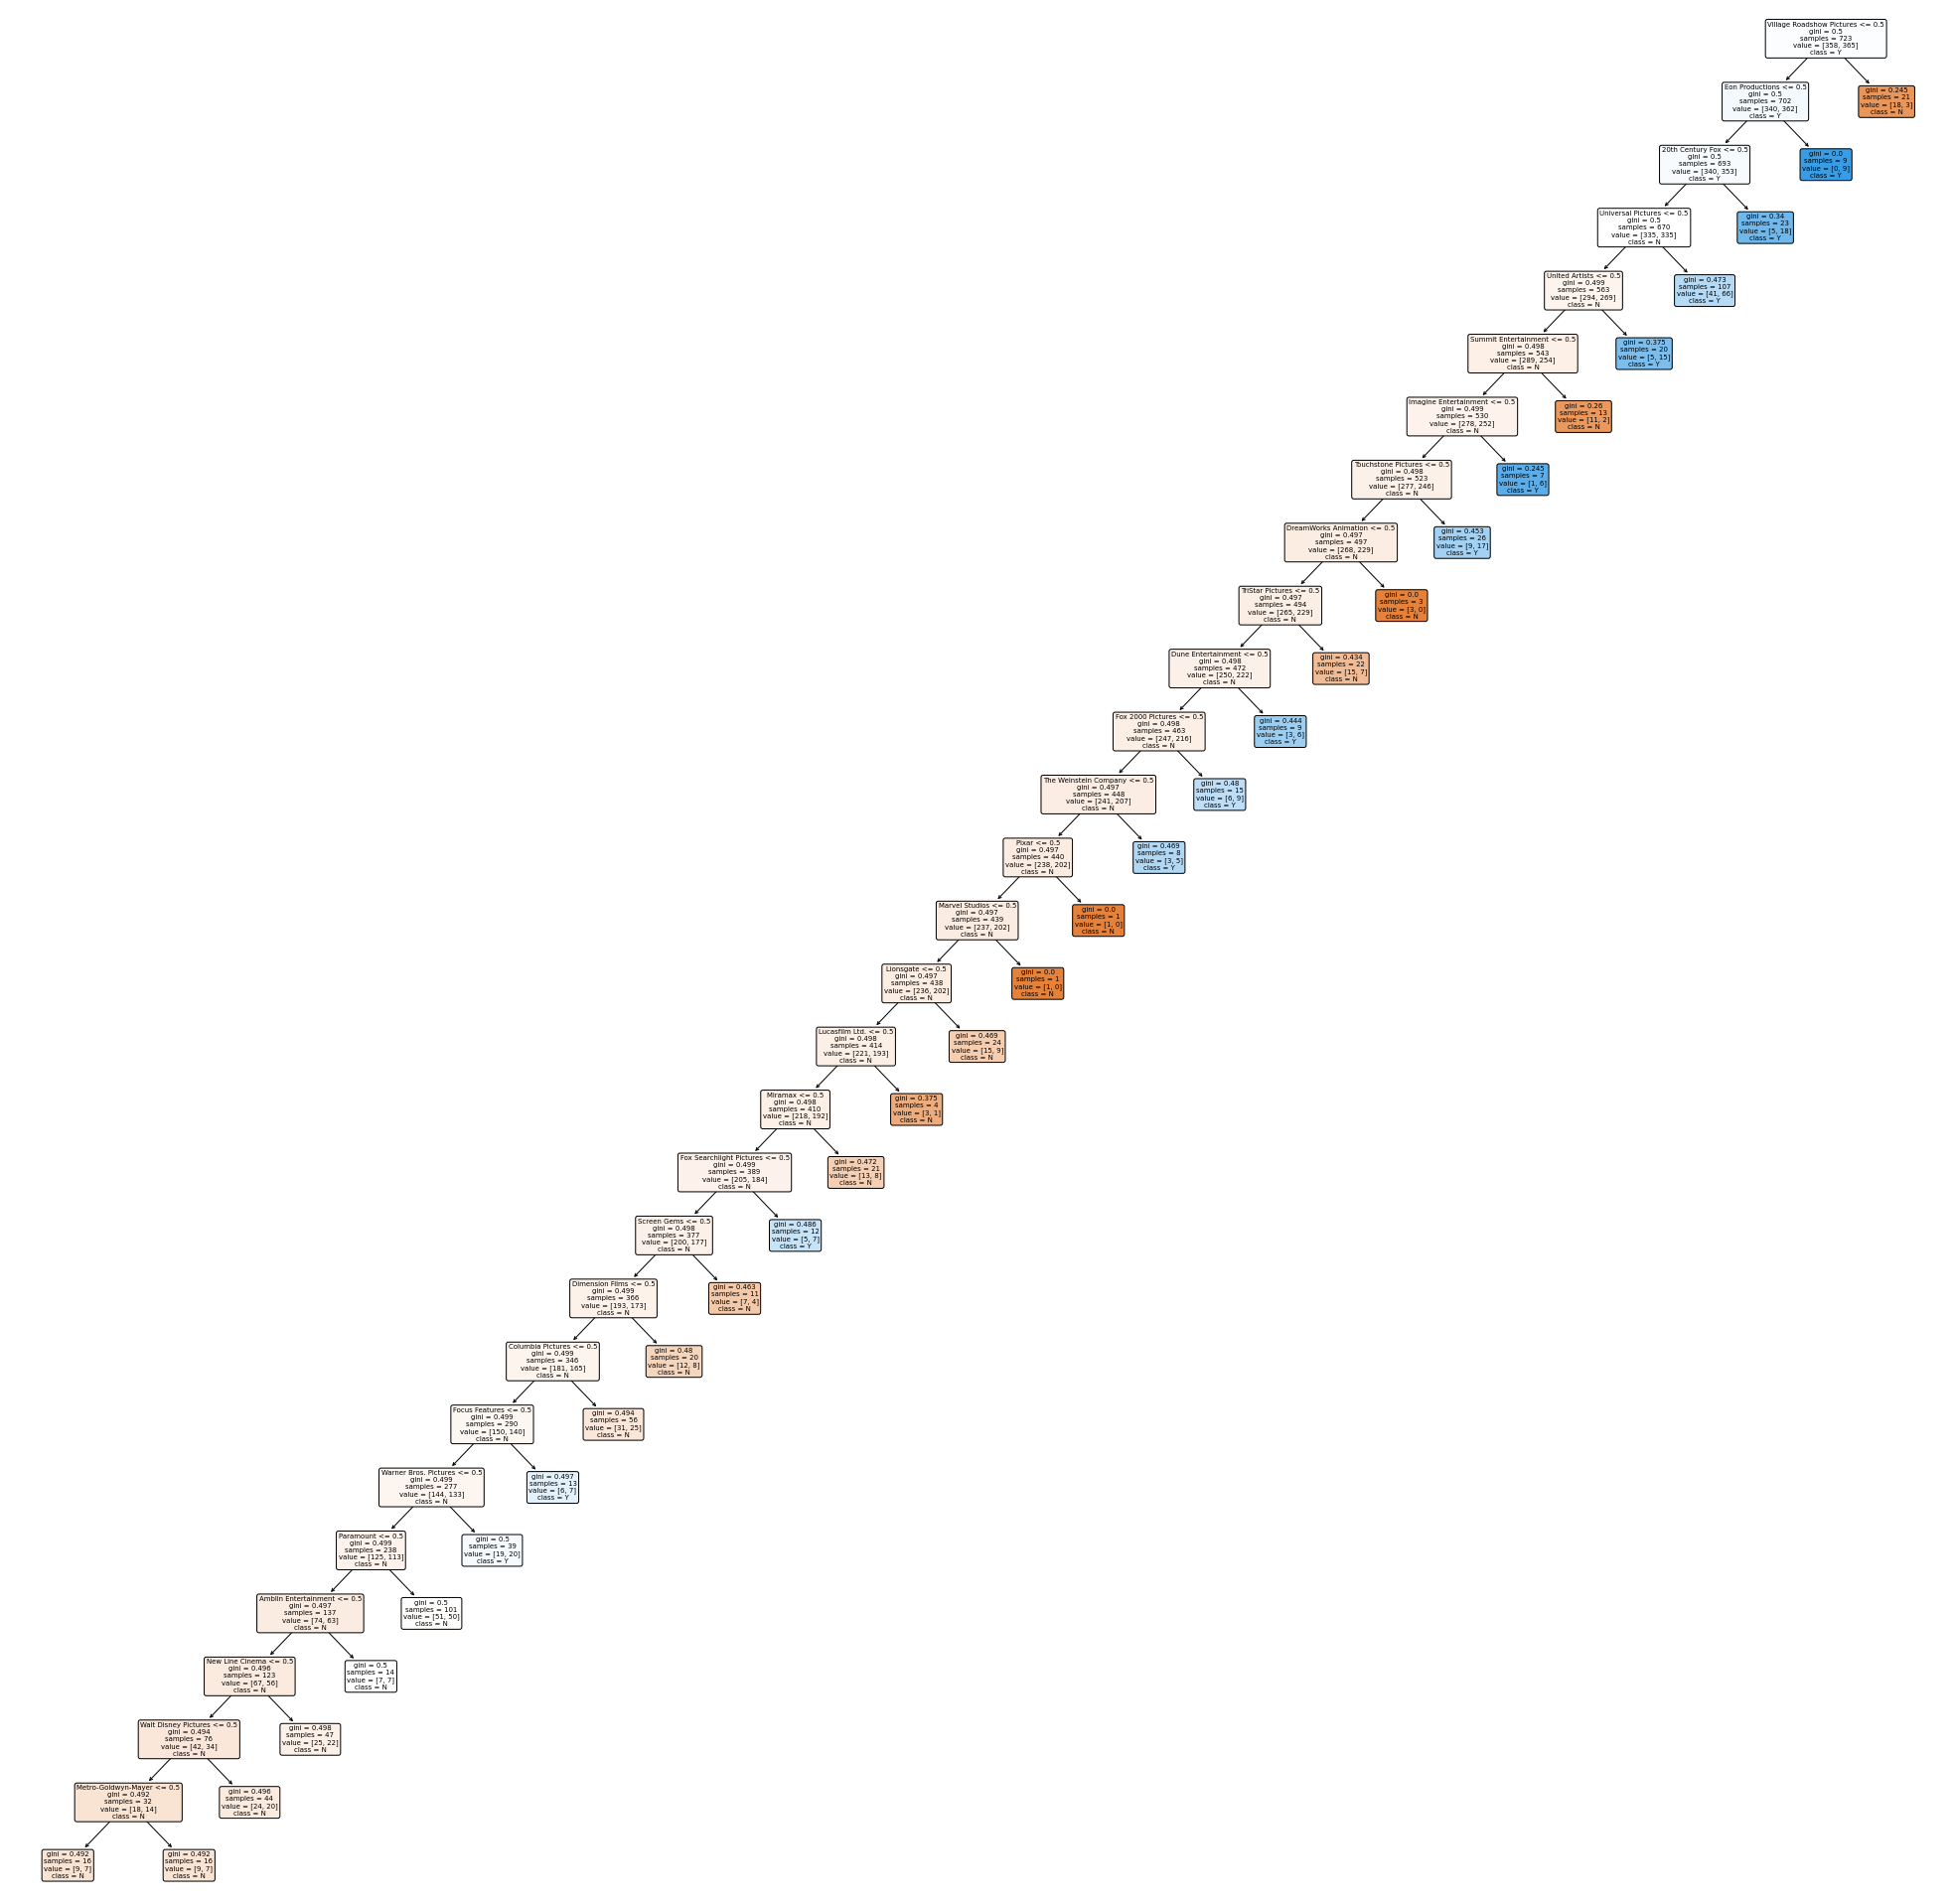

In [489]:
f = plt.figure(figsize=(35,35))
plot_tree(dectree6, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

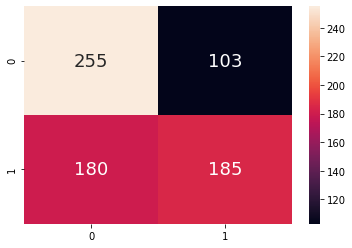

In [490]:
y_train_pred = dectree6.predict(X_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [491]:
print("Improved Production_Companies Train Data")
print("Accuracy  :\t", dectree6.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Improved Production_Companies Train Data
Accuracy  :	 0.6085753803596127

TPR Train :	 0.5068493150684932
TNR Train :	 0.7122905027932961

FPR Train :	 0.2877094972067039
FNR Train :	 0.4931506849315068


<AxesSubplot:>

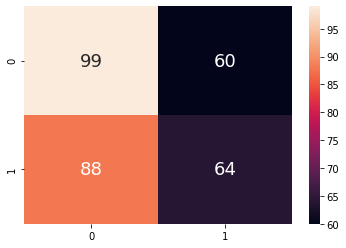

In [492]:
y_test_pred = dectree6.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [493]:
print("Improved Production_Companies Test Data")
print("Accuracy  :\t", dectree6.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Improved Production_Companies Test Data
Accuracy  :	 0.5241157556270096

TPR Test :	 0.42105263157894735
TNR Test :	 0.6226415094339622

FPR Test :	 0.37735849056603776
FNR Test :	 0.5789473684210527


# Multi-Variate Classification Tree

Exploring if comparing all predictors against the response variable will give a better result! 


Response Variable : **Successful**     
Predictor Feature : **Release Month, Genre, Budget, Production Companies** 

In [494]:
data = pd.DataFrame(totalMovieData[['Comedy','Drama','Action', 'Horror','Adventure','Crime','Animation',
        'Thriller','Fantasy','Science Fiction','Family','Romance','Mystery','Western','Music','History',
       'Documentary','War']])

proMovieData[['Comedy','Drama','Action', 'Horror','Adventure','Crime','Animation','Thriller','Fantasy',
              'Science Fiction','Family','Romance','Mystery','Western','Music','History',
               'Documentary','War']] = data

proMovieData.head()

,Movie Title,Budget,Revenue,Genres,Production_Companies,Release_Date,Release_Month,Successful,Genre_Number,Production_Companies_Number,...,Fantasy,Science Fiction,Family,Romance,Mystery,Western,Music,History,Documentary,War
0,Godzilla vs. Kong,200000000.0,123100000.0,Action,Warner Bros. Pictures,2021-03-24,3,N,3,6.0,...,0,0,0,0,0,0,0,0,0,0
1,The Little Things,30000000.0,23205000.0,Thriller,Warner Bros. Pictures,2021-01-28,1,N,8,6.0,...,1,0,0,0,0,0,0,0,0,0
2,Soul,150000000.0,57400000.0,Family,Walt Disney Pictures,2020-12-25,12,N,11,4.0,...,0,0,0,0,0,0,0,0,0,0
3,Mulan,200000000.0,57000000.0,Adventure,Walt Disney Pictures,2020-09-04,9,N,5,4.0,...,1,0,0,0,0,0,0,0,0,0
4,Dark Phoenix,200000000.0,252442974.0,Science Fiction,20th Century Fox,2019-06-05,6,N,10,7.0,...,0,0,0,0,0,0,0,0,0,0


In [495]:
y = pd.DataFrame(proMovieData["Successful"])
X = pd.DataFrame(proMovieData[["Release_Month", "Budget", 'Comedy','Drama','Action', 'Horror',
                               'Adventure','Crime','Animation','Thriller','Fantasy','Science Fiction',
                               'Family','Romance','Mystery','Western','Music','History',
                               'Documentary','War', 
                               'Universal Pictures',
                               'Paramount',
                               'Columbia Pictures',
                               'Walt Disney Pictures',
                               'New Line Cinema',
                               'Warner Bros. Pictures',
                               '20th Century Fox',
                               'Touchstone Pictures',
                               'United Artists',
                               'DreamWorks Animation',
                               'Summit Entertainment',
                               'Lionsgate',
                               'Marvel Studios',
                               'Fox 2000 Pictures',
                               'Metro-Goldwyn-Mayer',
                               'Amblin Entertainment',
                               'Screen Gems',
                               'Miramax',
                               'TriStar Pictures',
                               'Dimension Films',
                               'Pixar',
                               'Dune Entertainment',
                               'Village Roadshow Pictures',
                               'The Weinstein Company',
                               'Regency Enterprises',
                               'Eon Productions',
                               'Imagine Entertainment',
                               'Focus Features',
                               'Lucasfilm Ltd.', 
                               'Fox Searchlight Pictures']])

In [496]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (723, 1) (723, 50)
Test Set  : (311, 1) (311, 50)


In [497]:
from sklearn.tree import DecisionTreeClassifier

dectree7 = DecisionTreeClassifier(max_depth = 3)  
dectree7.fit(X_train, y_train)                   

DecisionTreeClassifier(max_depth=3)

[Text(334.8, 570.7800000000001, 'Budget <= 17005000.0\ngini = 0.5\nsamples = 723\nvalue = [365, 358]\nclass = N'),
 Text(167.4, 407.70000000000005, 'Budget <= 3608552.5\ngini = 0.426\nsamples = 221\nvalue = [68, 153]\nclass = Y'),
 Text(83.7, 244.62, 'Budget <= 27.5\ngini = 0.201\nsamples = 44\nvalue = [5, 39]\nclass = Y'),
 Text(41.85, 81.53999999999996, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = N'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.169\nsamples = 43\nvalue = [4, 39]\nclass = Y'),
 Text(251.10000000000002, 244.62, 'Crime <= 0.5\ngini = 0.458\nsamples = 177\nvalue = [63, 114]\nclass = Y'),
 Text(209.25, 81.53999999999996, 'gini = 0.451\nsamples = 172\nvalue = [59, 113]\nclass = Y'),
 Text(292.95, 81.53999999999996, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = N'),
 Text(502.20000000000005, 407.70000000000005, 'Release_Month <= 10.5\ngini = 0.483\nsamples = 502\nvalue = [297, 205]\nclass = N'),
 Text(418.5, 244.62, 'Budget <= 73500000.0\ngini = 0.465\

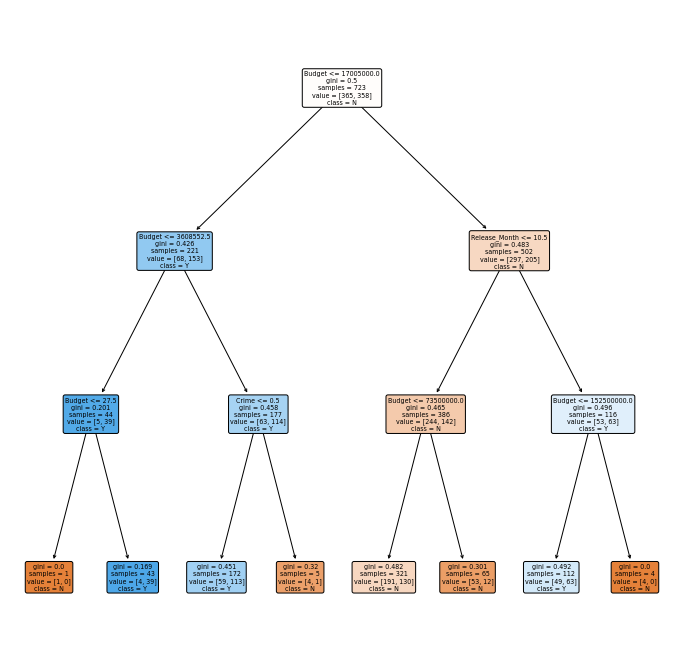

In [498]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree7, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

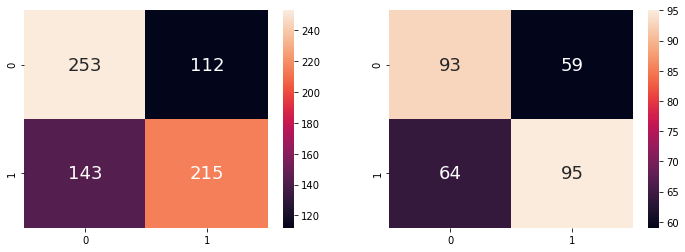

In [499]:
y_train_pred = dectree7.predict(X_train)
y_test_pred = dectree7.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [500]:
print("Multi-Variate Train Data")
print("Accuracy  :\t", dectree7.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Multi-Variate Train Data
Accuracy  :	 0.6473029045643154

TPR Train :	 0.6005586592178771
TNR Train :	 0.6931506849315069

FPR Train :	 0.30684931506849317
FNR Train :	 0.3994413407821229


In [501]:
print("Multi-Variate Test Data")
print("Accuracy  :\t", dectree7.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Multi-Variate Test Data
Accuracy  :	 0.6045016077170418

TPR Test :	 0.5974842767295597
TNR Test :	 0.6118421052631579

FPR Test :	 0.3881578947368421
FNR Test :	 0.4025157232704403


# Summary

    

###  We feel that none of our predictors can accurately predict how successful a movie is due to their low classification accuracy. The initial production companies model and the Multivariate classification tree managed to provide the highest classification accuracies. Despite that we feel that our dataset for these two, which happens to be around 1000 samples, are too small as compared to the overall 10,000 extracted earlier. Despite the improvements made, we expected the classification accuracy to increase. However, the results were fairly similar and in the Production Companies case it became worse. We believe the lower accuracy for Production Companies was due to a reduced sample size.

### With this in mind, we believe that having even more data to train the model will provide a better classification accuracy. Having more predictor variables for the Multivariate Classification model may also increase the classification accuracy as it did in our case. 